In [1]:
!pip install torchcodec datasets transformers librosa evaluate jiwer gradio accelerate bitsandbytes peft accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 34.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 42.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.8/444.8 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.7 MB/s eta 0:00:00:00:01

In [2]:
!pip uninstall -y huggingface_hub
!pip uninstall -y fsspec

Found existing installation: huggingface-hub 0.36.0
Uninstalling huggingface-hub-0.36.0:
  Successfully uninstalled huggingface-hub-0.36.0
Found existing installation: fsspec 2025.9.0
Uninstalling fsspec-2025.9.0:
  Successfully uninstalled fsspec-2025.9.0


In [3]:
!pip show huggingface_hub fsspec

In [4]:
!pip install --no-cache-dir "huggingface_hub==0.26.2" "fsspec==2024.9.0" s3fs dask[complete]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 324.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 117.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cudf-cu12 25.2.2 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 22.0.0 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 2.12.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.1.0 which is incompatible.
diffusers 0.34.0 requires huggingf

In [5]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
hf_token = user_secrets.get_secret("HF_TOKEN")

In [6]:
from huggingface_hub import login
login(token=hf_token)

In [7]:
import dask.dataframe as dd

# Login using e.g. `huggingface-cli login` to access this dataset
splits = {'train': 'english/train-*.parquet', 'eval': 'english/eval-*.parquet', 'corrected.test': 'english/corrected.test-*.parquet'}
df = dd.read_parquet("hf://datasets/leduckhai/MultiMed-ST/" + splits["train"])

In [8]:
df.head()

,audio,duration,text,Vietnamese,Chinese,French,German,source,link,type,topic,icd-10 code,speaker,role,gender,accent,traditional_chinese
0,{'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...,14.0,"As already said, I'm a wife, a mother, and a f...","Tôi là một người vợ, một người mẹ và một chuyê...",我是一名妻子、母亲，也是一名全职金融专业人士，每天要花三个小时来回通勤。我是一名 ME/CF...,"Je suis une femme mariée, une mère et une prof...","Ich bin eine Ehefrau, eine Mutter und eine Vol...",Nervous System 1.json,https://www.youtube.com/watch?v=8BJaiZz9eX8,Webinar,Nervous System,,"Rebekah Corlew, Joseph Hall, Nina Lichtenberg,...",,,us,我是一位妻子、母親，也是一位全職金融專業人士，每天需花費三個小時往返通勤。我是一位 ME/C...
1,{'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...,11.0,I was diagnosed in 1995 after recovering from ...,Tôi được chẩn đoán vào năm 1995 sau khi hồi ph...,我在从EB病毒恢复后，于1995年被诊断出。休息了几周，每小时服用泰诺，还要跳舞试试。,J'ai été diagnostiqué en 1995 après avoir récu...,"Ich wurde 1995 diagnostiziert, nachdem ich mic...",Nervous System 1.json,https://www.youtube.com/watch?v=8BJaiZz9eX8,Webinar,Nervous System,,"Rebekah Corlew, Joseph Hall, Nina Lichtenberg,...",,,us,我在1995年診斷出感染EB病毒後復原，休息數週，每小時服用泰諾，並嘗試跳舞。
2,{'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...,10.0,advil shovel and I was okay and then one day I...,"Tôi uống Advil, tôi ổn, rồi một ngày tôi không...",我吃了止痛药，感觉好多了，然后有一天突然就不行了。所以，在 1995 年，我 12 岁的时候...,"J'ai pris de l'Advil, j'allais bien, puis un j...","Ich nahm Advil, es ging mir gut, und dann eine...",Nervous System 1.json,https://www.youtube.com/watch?v=8BJaiZz9eX8,Webinar,Nervous System,,"Rebekah Corlew, Joseph Hall, Nina Lichtenberg,...",,,us,我服用了止痛藥，感覺好多了，然後有一天突然就不行了。所以，在1995年，我12歲的時候，我就...
3,{'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...,11.0,More people were familiar with the term yuppie...,Nhiều người quen thuộc với thuật ngữ “cảm cúm ...,更多的人熟悉“雅皮士流感”这个词，而不是慢性疲劳综合征的诊断甚至真实性。那时还没有谷歌，我也...,Plus de gens connaissaient le terme de « gripp...,Mehr Menschen waren mit dem Begriff „Yuppie-Gr...,Nervous System 1.json,https://www.youtube.com/watch?v=8BJaiZz9eX8,Webinar,Nervous System,,"Rebekah Corlew, Joseph Hall, Nina Lichtenberg,...",,,us,更多人熟悉「雅痞流感」一詞，而非慢性疲勞症候群的診斷甚至真實性。當時尚未有谷歌，我也無法向您查詢。
4,{'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...,11.0,"In 1995, during the late night hours that I wa...","Năm 1995, trong những giờ đêm muộn khi tôi quá...",1995年，在我疲惫到无法入睡的深夜，这是所有ME/CFS症状中最令人沮丧的矛盾。,"En 1995, pendant les heures tardives de la nui...","Im Jahr 1995, während der späten Nachtstunden,...",Nervous System 1.json,https://www.youtube.com/watch?v=8BJaiZz9eX8,Webinar,Nervous System,,"Rebekah Corlew, Joseph Hall, Nina Lichtenberg,...",,,us,1995年，在我疲憊到無法入睡的深夜，這是所有ME/CFS症狀中最令人沮喪的矛盾。


In [9]:
df.columns

Index(['audio', 'duration', 'text', 'Vietnamese', 'Chinese', 'French',
       'German', 'source', 'link', 'type', 'topic', 'icd-10 code', 'speaker',
       'role', 'gender', 'accent', 'traditional_chinese'],
      dtype='object')

In [10]:
df.isna().sum().compute()

audio                     0
duration                  0
text                      0
Vietnamese                0
Chinese                   0
French                    0
German                    0
source                 2464
link                   2464
type                   2464
topic                  2464
icd-10 code            2464
speaker                2464
role                   2464
gender                 2464
accent                 2464
traditional_chinese       0
dtype: int64

In [11]:
# # -----------🧪 Quality & Missing Data Check----------------

# missing = sample.isna().mean().sort_values(ascending=False)
# missing.plot(kind="bar", figsize=(10,4))
# plt.title("Missing Value Ratio per Column")
# plt.ylabel("Fraction Missing")
# plt.show()


In [12]:
# ----------------🧹 Step 1 – Initial Cleaning & Feature Engineering----------------
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Compute only small chunks when needed
sample = df.sample(frac=0.01).compute()

# Basic cleaning
sample = sample.dropna(subset=["audio", "text"])
sample["text_len"] = sample["text"].apply(lambda x: len(str(x).split()))
sample["duration_min"] = sample["duration"] / 60


In [13]:
cols = ["role", "gender", "topic", "accent"]
for c in cols:
    sample[c] = sample[c].astype("string").str.strip().replace("", "Unknown").fillna("Unknown")

In [14]:
# --------------------Step 2 – General Overview------------------------
print(sample.describe(include='all'))
print("Unique speakers:", sample["speaker"].nunique())
print("Unique topics:", sample["topic"].nunique())


                                                    audio    duration  \
count                                                 260  260.000000   
unique                                                260         NaN   
top     {'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...         NaN   
freq                                                    1         NaN   
mean                                                  NaN   10.684615   
std                                                   NaN    2.569601   
min                                                   NaN    5.000000   
25%                                                   NaN    9.000000   
50%                                                   NaN   11.000000   
75%                                                   NaN   12.000000   
max                                                   NaN   21.000000   

                                                     text  \
count                                                 260   
u

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


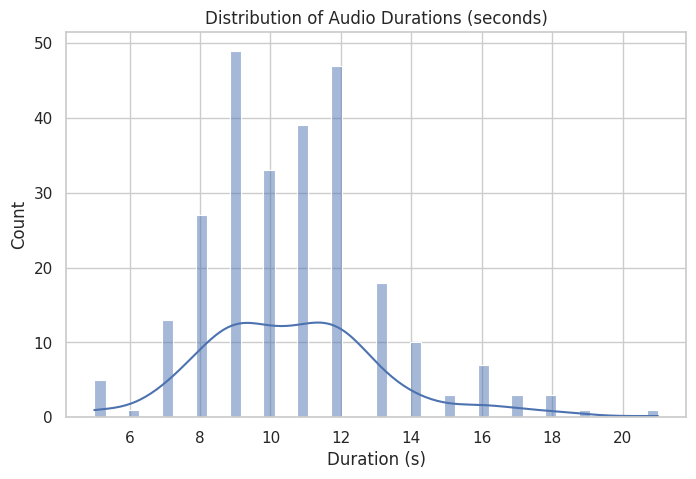

In [15]:
# -------------------📈 Step 3 – Distributions-----------------
# a) Utterance duration distribution

plt.figure(figsize=(8,5))
sns.histplot(sample["duration"], bins=50, kde=True)
plt.title("Distribution of Audio Durations (seconds)")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


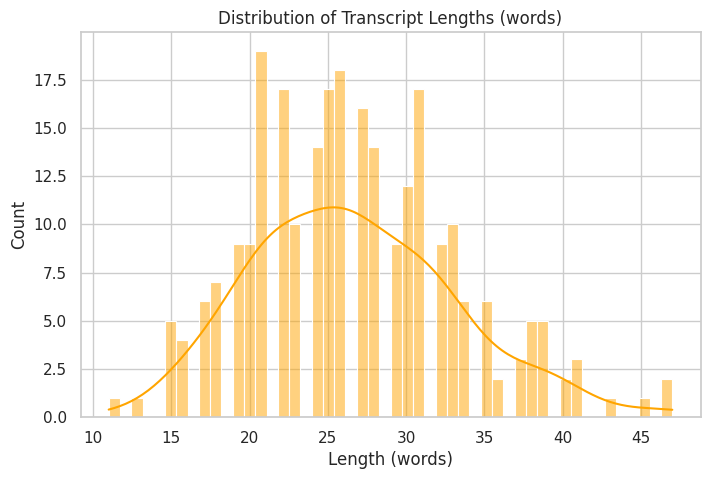

In [16]:
# b) Transcript length
plt.figure(figsize=(8,5))
sns.histplot(sample["text_len"], bins=50, kde=True, color="orange")
plt.title("Distribution of Transcript Lengths (words)")
plt.xlabel("Length (words)")
plt.show()


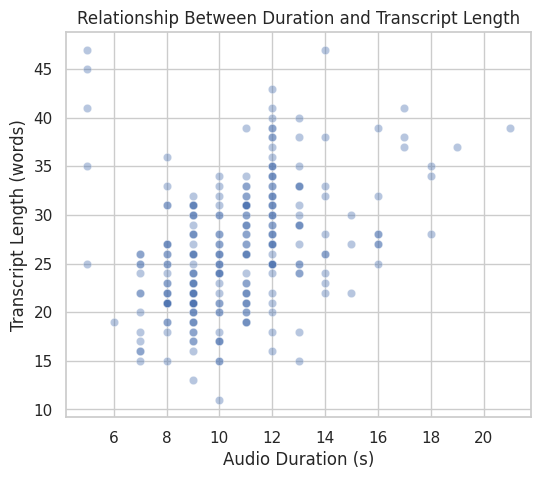

In [17]:
# c) Duration vs Transcript Length
plt.figure(figsize=(6,5))
sns.scatterplot(x="duration", y="text_len", data=sample, alpha=0.4)
plt.title("Relationship Between Duration and Transcript Length")
plt.xlabel("Audio Duration (s)")
plt.ylabel("Transcript Length (words)")
plt.show()


In [18]:
sample["role"].value_counts().index

Index(['Unknown', 'Dr', 'Professor', 'Lecturer'], dtype='string', name='role')

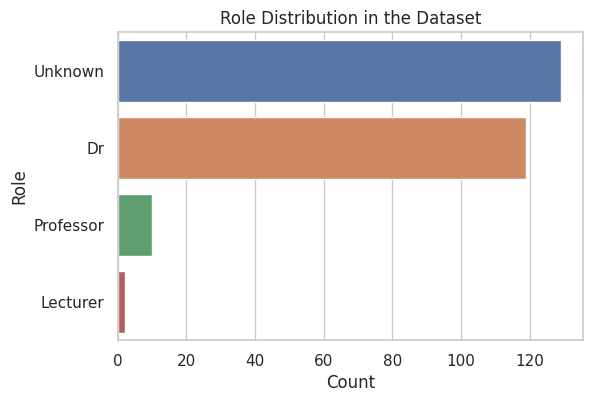

In [19]:
# ----------------🎙️ Step 4 – Categorical Analysis-------------------
# a) By Role (doctor vs patient vs lecturer)

plt.figure(figsize=(6,4))
sns.countplot(
    y="role",
    data=sample,
    order=sample["role"].value_counts().index
)
plt.title("Role Distribution in the Dataset")
plt.xlabel("Count")
plt.ylabel("Role")
plt.show()


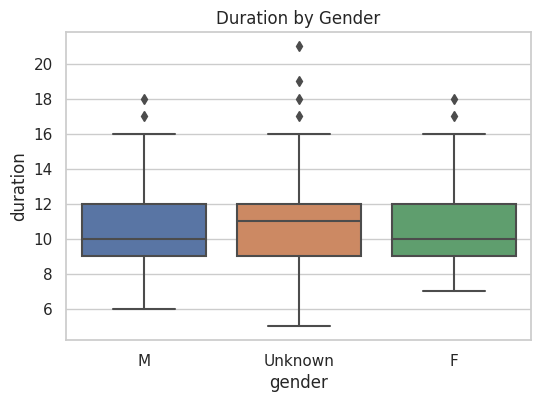

In [20]:
# b) Gender vs Duration
plt.figure(figsize=(6,4))
sns.boxplot(x="gender", y="duration", data=sample)
plt.title("Duration by Gender")
plt.show()


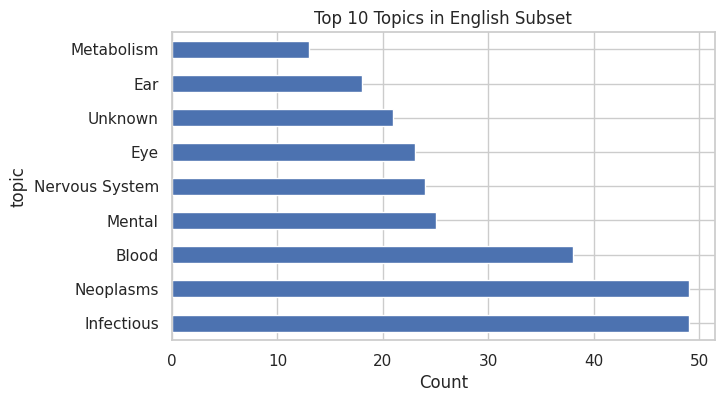

In [21]:
# c) Topic Frequency
top_topics = sample["topic"].value_counts().nlargest(10)
top_topics.plot(kind="barh", figsize=(7,4))
plt.title("Top 10 Topics in English Subset")
plt.xlabel("Count")
plt.show()


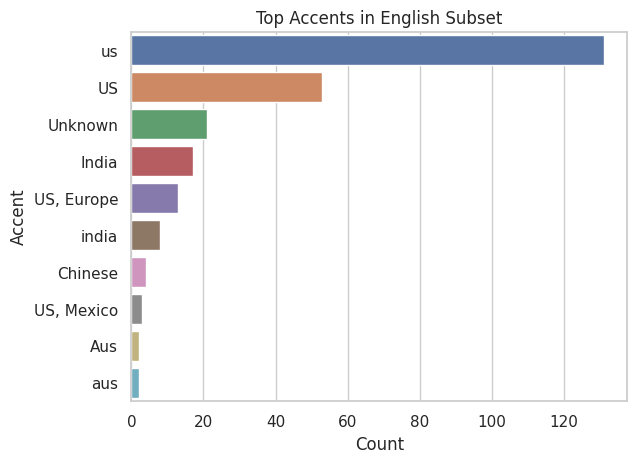

In [22]:
# -------------🔍 Step 6 – Language & Accent Patterns--------------
accent_counts = sample["accent"].value_counts().nlargest(10)
sns.barplot(x=accent_counts.values, y=accent_counts.index)
plt.title("Top Accents in English Subset")
plt.xlabel("Count")
plt.ylabel("Accent")
plt.show()


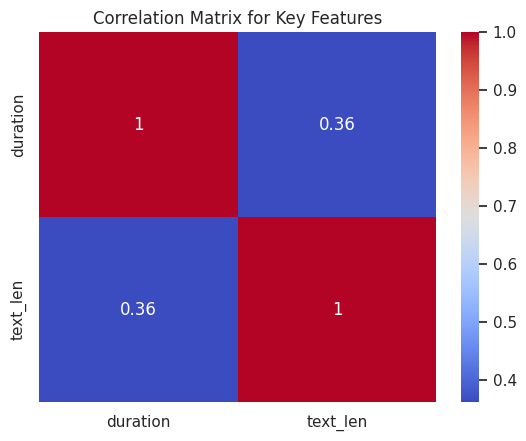

In [23]:
#---------------🧠 Step 7 – Correlation Insights--------------
corr = sample[["duration", "text_len"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Key Features")
plt.show()


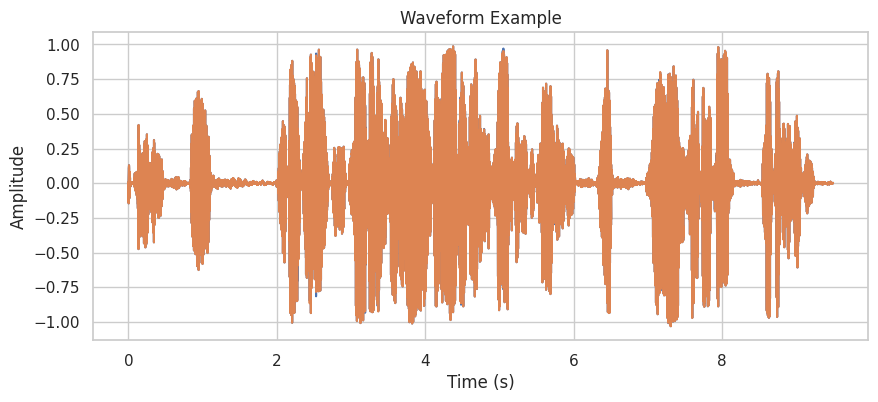

In [24]:
import io
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

row = sample.iloc[0]["audio"]

# Case 1: audio is stored as dict with bytes
if isinstance(row, dict) and "bytes" in row:
    audio_bytes = io.BytesIO(row["bytes"])
    data, sr = sf.read(audio_bytes)

# Case 2: audio is a URL string (rare)
elif isinstance(row, str) and row.startswith("http"):
    import requests
    resp = requests.get(row)
    data, sr = sf.read(io.BytesIO(resp.content))

# Case 3: something unexpected
else:
    raise ValueError("Unknown audio format:", type(row))

# Plot waveform
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(data) / sr, len(data)), data)
plt.title("Waveform Example")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [25]:
print(f"Sample rate: {sr} Hz")
print(f"Duration: {len(data)/sr:.2f} seconds")


Sample rate: 48000 Hz
Duration: 9.49 seconds


In [26]:
def get_duration(row):
    try:
        if isinstance(row, dict) and "bytes" in row:
            audio_bytes = io.BytesIO(row["bytes"])
            data, sr = sf.read(audio_bytes)
            return len(data) / sr
    except Exception:
        return np.nan

sample["computed_duration"] = sample["audio"].apply(get_duration)


In [27]:
sample.head()

,audio,duration,text,Vietnamese,Chinese,French,German,source,link,type,topic,icd-10 code,speaker,role,gender,accent,traditional_chinese,text_len,duration_min,computed_duration
1130,{'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...,9.0,I can't even state how incredible this really ...,Tôi thậm chí không thể diễn tả nó tuyệt vời nh...,我甚至无法形容这有多不可思议，我们所有人都有这种能力，对吧？我们体内有一种叫做白细胞的东西。,Je ne peux même pas dire à quel point c'est in...,"Ich kann gar nicht sagen, wie unglaublich das ...",Nervous System 5.json,https://www.youtube.com/watch?v=poOf8b2WE2g,Talk,Nervous System,,Andrew Huberman,Dr,M,us,我甚至無法形容這有多不可思議，我們所有人都有這種能力，對吧？我們體內有一種叫做白血球的東西。,23,0.150000,9.493
1168,{'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...,9.0,and Stanford Medicine with a foreword by Jared...,"và Trường Y Stanford, với lời giới thiệu của J...",以及斯坦福医学院，并附有贾雷德·戴蒙德和罗伯特·萨波尔斯基的序言。因此，这本书确实有很多重量...,"et la faculté de médecine de Stanford, avec un...",und der Stanford Medicine mit einem Vorwort vo...,Nervous System 5.json,https://www.youtube.com/watch?v=poOf8b2WE2g,Talk,Nervous System,,Andrew Huberman,Dr,M,us,以及史丹福大學醫學院，並附有賈雷德·戴蒙德和羅伯特·薩波斯基的序言。因此，本書確實有很多重量...,30,0.150000,9.120
2271,{'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...,12.0,email and said you know had all of these sympt...,Cô ấy đã gửi email và nói rằng cô ấy đã có tất...,她发邮件说她有所有这些症状，并想来美国接受评估。这是一名 36 岁的女性，她报告了疲劳、头晕...,Elle a envoyé un e-mail pour dire qu'elle avai...,"Sie schrieb eine E-Mail und sagte, dass sie al...",Nervous System 6.json,https://www.youtube.com/watch?v=N77sfyQB63A,Lecture,Nervous System,,Brent Goodman,Dr,M,us,她電郵表示她出現所有這些症狀，並想來美國接受評估。這是一名 36 歲女性，她報告有疲倦、頭暈...,36,0.200000,11.760
2427,{'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...,16.0,a covalent ERK1/2 inhibitor investigated as a...,Một chất ức chế ERK1/2 cộng hóa trị được nghiê...,一种共价ERK1 / 2抑制剂，正在研究作为实体瘤治疗方法。因此，顶部显示了CC-90003...,Un inhibiteur covalent d'ERK1/2 étudié en tant...,"Ein kovalenter ERK1/2-Inhibitor, der als Thera...",Nervous System 2.json,https://www.youtube.com/watch?v=By9WRbYas5w,Lecture,Nervous System,,"Evangelos Kiskinis, David Belair",Unknown,Unknown,us,一種共價ERK1/2抑制劑，正研發作為實體瘤治療方法。因此，上方顯示了CC-90003的晶體...,32,0.266667,16.000
587,{'bytes': b'OggS\x00\x02\x00\x00\x00\x00\x00\x...,9.0,"Well, they looked at all of the spectrum, but ...","Họ đã xem xét toàn bộ quang phổ, nhưng đã tìm ...",他们研究了整个光谱，但在β和γ波段，发现了患病和未患病人群之间真正的差异。,"Ils ont examiné tout le spectre, mais ont trou...","Sie untersuchten das gesamte Spektrum, fanden ...",Nervous System 1.json,https://www.youtube.com/watch?v=8BJaiZz9eX8,Webinar,Nervous System,,"Rebekah Corlew, Joseph Hall, Nina Lichtenberg,...",Unknown,Unknown,us,他們研究了整個光譜，但在β和γ波段，發現了患病和未患病人群之間真正的差異。,21,0.150000,8.722
